## Zindi Online Challenge


http://zindi.africa/competitions/sbtic-xente-credit-scoring-challenge

### Contents

1. Imports
2. EDA
3. Feature Selection
4. Benchmarking
5. Test Data
6. Machine Learning
7. Bonus

# 1. Imports

In [173]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from sklearn import metrics
import matplotlib.pyplot as plt

In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10, 6)})

## 1.1 Helper Functions

In [176]:
class DataProcess:
    def __init__(self, df):
        self.df = df
        
    def Numerical(df):
        return df.select_dtypes(include=['int64', 'float64'])
        
    def Categorical(df):
        return df.select_dtypes(include=['object'])
        
    def Missing(df):
        return sns.heatmap(df.isnull(), cbar=False, cmap='viridis'); 
    
    def df_joiner(df1, df2):
        return pd.concat(df1, df2)
    
    def get_month(x):
        return (x.month)

    def get_year(x):
        return (x.year)
    
    def get_day(x):
        return (x.day)
    
    def correlation_map(df):
        # Create figure and axes and set figure size
        f, ax = plt.subplots(figsize=(20,10))
        return sns.heatmap(data=df.corr(), annot=False);

## 1.2 Read in Data

In [177]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

In [178]:
train.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
test.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [180]:
sample.head()

,TransactionId,IsDefaulted
0,TransactionId_925,0.0
1,TransactionId_1080,1.0
2,TransactionId_2315,0.0
3,TransactionId_1466,0.0
4,TransactionId_337,1.0


In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
CustomerId               2100 non-null object
TransactionStartTime     2100 non-null object
Value                    2100 non-null float64
Amount                   2100 non-null float64
TransactionId            2100 non-null object
BatchId                  2100 non-null object
SubscriptionId           2100 non-null object
CurrencyCode             2100 non-null object
CountryCode              2100 non-null int64
ProviderId               2100 non-null object
ProductId                2100 non-null object
ProductCategory          2100 non-null object
ChannelId                2100 non-null object
TransactionStatus        2100 non-null int64
IssuedDateLoan           1488 non-null object
AmountLoan               1488 non-null float64
Currency                 1488 non-null object
LoanId                   1488 non-null object
PaidOnDate               1488 non-null object
IsFinalPayBack    

## 2. Exploratory Data Analysis

In [182]:
categorical_feat = DataProcess.Categorical(train)
numerical_feat = DataProcess.Numerical(train)

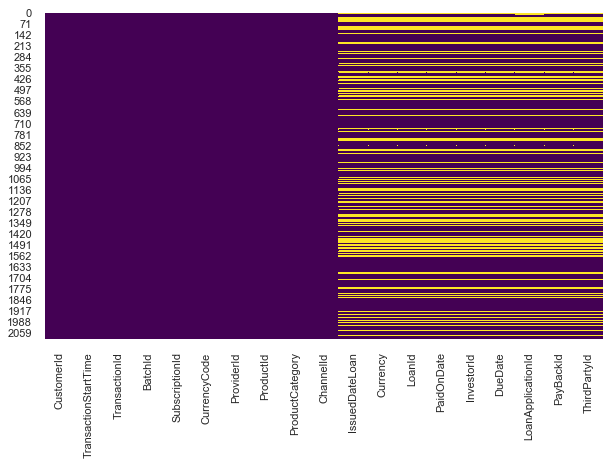

In [183]:
DataProcess.Missing(categorical_feat);

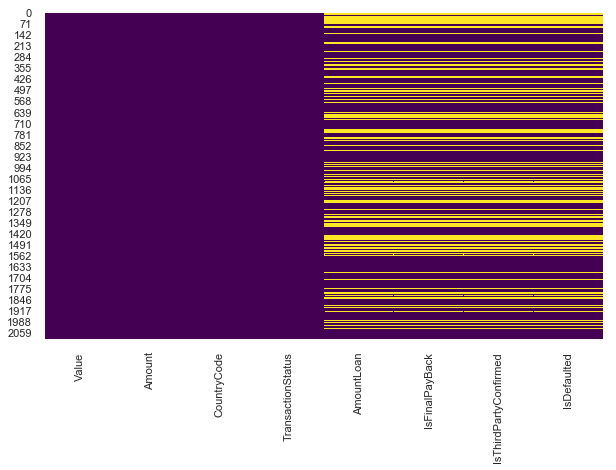

In [184]:
DataProcess.Missing(numerical_feat);

In [185]:
new_df = train.dropna()

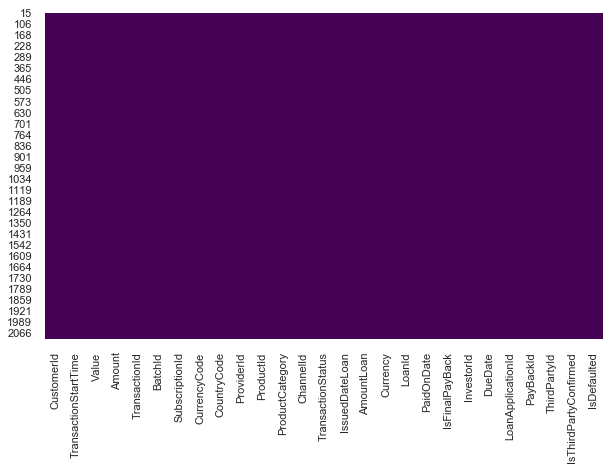

In [186]:
DataProcess.Missing(new_df);

In [189]:
new_df.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan',
       'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId',
       'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted'],
      dtype='object')

In [190]:
new_df.IsFinalPayBack.value_counts()

1.0    1080
0.0     399
Name: IsFinalPayBack, dtype: int64

In [191]:
new_df.ProductCategory.value_counts()

airtime               920
retail                235
data_bundles          177
utility_bill           86
tv                     53
movies                  5
financial_services      3
Name: ProductCategory, dtype: int64

In [192]:
new_df.IsThirdPartyConfirmed.value_counts()

1.0    1458
0.0      21
Name: IsThirdPartyConfirmed, dtype: int64

# 3. Feature Selection 

In [193]:
train_df = new_df[['TransactionStartTime', 'DueDate', 'Value', 'IsThirdPartyConfirmed', 'IsDefaulted' ]]
train_df.head()

,TransactionStartTime,DueDate,Value,IsThirdPartyConfirmed,IsDefaulted
15,2018-10-22 16:04:25,2018-11-21 16:03:32,5000.0,0.0,0.0
17,2018-10-23 13:12:23,2018-11-22 13:12:16,500.0,0.0,0.0
18,2018-10-23 15:20:58,2018-11-22 15:20:53,1000.0,0.0,0.0
19,2018-10-23 15:31:27,2018-11-23 06:33:57,500.0,0.0,0.0
20,2018-10-24 06:56:02,2018-11-23 06:55:58,500.0,0.0,0.0


In [194]:
train_df.dtypes

TransactionStartTime      object
DueDate                   object
Value                    float64
IsThirdPartyConfirmed    float64
IsDefaulted              float64
dtype: object

In [195]:
train_df['TransactionStartTime'] = pd.to_datetime(train_df['TransactionStartTime'])
train_df['DueDate'] = pd.to_datetime(train_df['DueDate'])

In [196]:
train_df.dtypes

TransactionStartTime     datetime64[ns]
DueDate                  datetime64[ns]
Value                           float64
IsThirdPartyConfirmed           float64
IsDefaulted                     float64
dtype: object

In [197]:
train_df.head()

,TransactionStartTime,DueDate,Value,IsThirdPartyConfirmed,IsDefaulted
15,2018-10-22 16:04:25,2018-11-21 16:03:32,5000.0,0.0,0.0
17,2018-10-23 13:12:23,2018-11-22 13:12:16,500.0,0.0,0.0
18,2018-10-23 15:20:58,2018-11-22 15:20:53,1000.0,0.0,0.0
19,2018-10-23 15:31:27,2018-11-23 06:33:57,500.0,0.0,0.0
20,2018-10-24 06:56:02,2018-11-23 06:55:58,500.0,0.0,0.0


In [198]:
# Extract the start dates
train_df['start_month'] = train_df['TransactionStartTime'].apply(DataProcess.get_month)
train_df['start_year'] = train_df['TransactionStartTime'].apply(DataProcess.get_year)
train_df['start_day'] = train_df['TransactionStartTime'].apply(DataProcess.get_day)

# Extract the due dates
train_df['due_month'] = train_df['DueDate'].apply(DataProcess.get_month)
train_df['due_year'] = train_df['DueDate'].apply(DataProcess.get_year)
train_df['due_day'] = train_df['DueDate'].apply(DataProcess.get_day)

In [199]:
train_df.head()

,TransactionStartTime,DueDate,Value,IsThirdPartyConfirmed,IsDefaulted,start_month,start_year,start_day,due_month,due_year,due_day
15,2018-10-22 16:04:25,2018-11-21 16:03:32,5000.0,0.0,0.0,10,2018,22,11,2018,21
17,2018-10-23 13:12:23,2018-11-22 13:12:16,500.0,0.0,0.0,10,2018,23,11,2018,22
18,2018-10-23 15:20:58,2018-11-22 15:20:53,1000.0,0.0,0.0,10,2018,23,11,2018,22
19,2018-10-23 15:31:27,2018-11-23 06:33:57,500.0,0.0,0.0,10,2018,23,11,2018,23
20,2018-10-24 06:56:02,2018-11-23 06:55:58,500.0,0.0,0.0,10,2018,24,11,2018,23


In [200]:
train_df = train_df.drop(['TransactionStartTime', 'DueDate'], axis=1)
train_df.head()

,Value,IsThirdPartyConfirmed,IsDefaulted,start_month,start_year,start_day,due_month,due_year,due_day
15,5000.0,0.0,0.0,10,2018,22,11,2018,21
17,500.0,0.0,0.0,10,2018,23,11,2018,22
18,1000.0,0.0,0.0,10,2018,23,11,2018,22
19,500.0,0.0,0.0,10,2018,23,11,2018,23
20,500.0,0.0,0.0,10,2018,24,11,2018,23


In [201]:
train_df.describe()

,Value,IsThirdPartyConfirmed,IsDefaulted,start_month,start_year,start_day,due_month,due_year,due_day
count,1.479000e+03,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,5.214636e+04,0.985801,0.118999,4.720757,2018.720757,15.992563,3.595673,2018.898580,15.810683
std,1.674981e+05,0.118350,0.323897,4.352349,0.448779,8.868492,2.972610,0.301986,9.048994
min,1.000000e+02,0.000000,0.000000,1.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000
25%,1.000000e+03,1.000000,0.000000,2.000000,2018.000000,7.000000,2.000000,2019.000000,7.000000
50%,4.720000e+03,1.000000,0.000000,3.000000,2019.000000,16.000000,3.000000,2019.000000,16.000000
75%,1.200000e+04,1.000000,0.000000,11.000000,2019.000000,24.000000,4.000000,2019.000000,24.000000
max,2.500000e+06,1.000000,1.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000,31.000000


In [202]:
train_df['Value'] = train_df['Value']/5000
train_df['start_month'] = train_df['start_month']
train_df['start_year'] = train_df['start_year']/100
train_df['start_day'] = train_df['start_day']/10

train_df['due_year'] = train_df['due_year']/100
train_df['due_month'] = train_df['due_month']
train_df['due_day'] = train_df['due_day']/10

In [203]:
train_df.head()

,Value,IsThirdPartyConfirmed,IsDefaulted,start_month,start_year,start_day,due_month,due_year,due_day
15,1.0,0.0,0.0,10,20.18,2.2,11,20.18,2.1
17,0.1,0.0,0.0,10,20.18,2.3,11,20.18,2.2
18,0.2,0.0,0.0,10,20.18,2.3,11,20.18,2.2
19,0.1,0.0,0.0,10,20.18,2.3,11,20.18,2.3
20,0.1,0.0,0.0,10,20.18,2.4,11,20.18,2.3


# 4. Benchmarking

In [204]:
new_df.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan',
       'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId',
       'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted'],
      dtype='object')

In [205]:
new_df['IsDefaulted'].value_counts()

0.0    1303
1.0     176
Name: IsDefaulted, dtype: int64

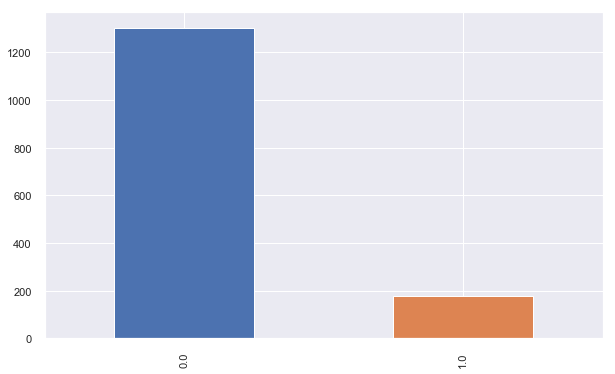

In [206]:
new_df['IsDefaulted'].value_counts().plot(kind='bar');

### Defaulters

In [207]:
176/(176+1303) * 100

11.899932386747803

### Did not Default

In [208]:
1303/(176+1303) * 100

88.1000676132522

In [209]:
dummy_results = []

for i in range(1, 906):
    dummy_results.append(0)
    

In [210]:
sample.head()

,TransactionId,IsDefaulted
0,TransactionId_925,0.0
1,TransactionId_1080,1.0
2,TransactionId_2315,0.0
3,TransactionId_1466,0.0
4,TransactionId_337,1.0


In [211]:
len(dummy_results)

905

In [212]:
dummy_results[:5]

[0, 0, 0, 0, 0]

In [213]:
dummy_submit = {'TransactionId': test['TransactionId'], 'IsDefaulted':dummy_results}
dummy_submit = pd.DataFrame(dummy_submit)

In [219]:
dummy_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
CustomerId     905 non-null object
IsDefaulted    905 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


In [215]:
dummy_submit.to_csv('Benchmark.csv', index=False)

# 5. Test Data

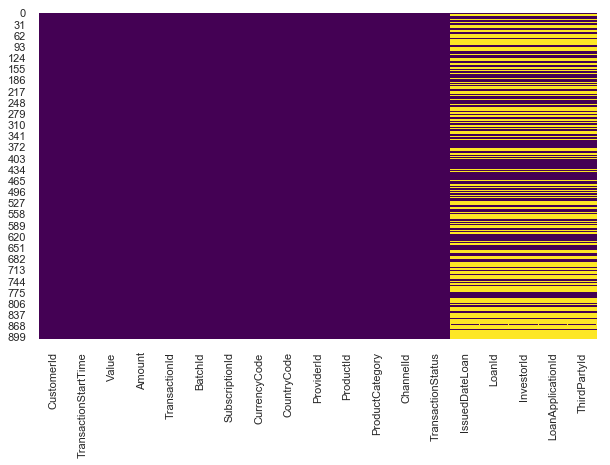

In [220]:
DataProcess.Missing(test);

In [221]:
test.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [222]:
test.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [223]:
test.ThirdPartyId.head(10)

0    ThirdPartyId_1175
1     ThirdPartyId_604
2    ThirdPartyId_1521
3     ThirdPartyId_406
4     ThirdPartyId_302
5                  NaN
6                  NaN
7     ThirdPartyId_281
8                  NaN
9                  NaN
Name: ThirdPartyId, dtype: object

In [224]:
def convert_str(x):
    return (str(x))

def confirm(x):
    if x == 'nan':
        return (0)
    else:
        return (1)

In [225]:
test['ThirdPartyId'] = test['ThirdPartyId'].apply(convert_str)

In [226]:
test['IsThirdPartyConfirmed'] = test['ThirdPartyId'].apply(confirm)

In [227]:
test['IsThirdPartyConfirmed'].value_counts()

1    478
0    427
Name: IsThirdPartyConfirmed, dtype: int64

In [228]:
test_df = test[['TransactionStartTime', 'IssuedDateLoan', 'Value', 'IsThirdPartyConfirmed']]
test_df.head()

,TransactionStartTime,IssuedDateLoan,Value,IsThirdPartyConfirmed
0,2019-03-31 13:33:05,2019-03-31 13:33:04,14000.0,1
1,2019-03-31 15:04:09,2019-03-31 15:04:08,1000.0,1
2,2019-03-31 17:31:11,2019-03-31 17:31:09,2500.0,1
3,2019-03-31 17:32:15,2019-03-31 17:32:14,500.0,1
4,2019-03-31 17:34:41,2019-03-31 17:34:40,1000.0,1


In [229]:
test_df['TransactionStartTime'] = pd.to_datetime(test_df['TransactionStartTime'])
test_df['IssuedDateLoan'] = pd.to_datetime(test_df['IssuedDateLoan'])

In [230]:
# Extract the start dates
test_df['start_month'] = test_df['TransactionStartTime'].apply(DataProcess.get_month)
test_df['start_year'] = test_df['TransactionStartTime'].apply(DataProcess.get_year)
test_df['start_day'] = test_df['TransactionStartTime'].apply(DataProcess.get_day)

# Extract the due dates
test_df['due_month'] = test_df['IssuedDateLoan'].apply(DataProcess.get_month)
test_df['due_year'] = test_df['IssuedDateLoan'].apply(DataProcess.get_year)
test_df['due_day'] = test_df['IssuedDateLoan'].apply(DataProcess.get_day)

In [231]:
test_df.head()

,TransactionStartTime,IssuedDateLoan,Value,IsThirdPartyConfirmed,start_month,start_year,start_day,due_month,due_year,due_day
0,2019-03-31 13:33:05,2019-03-31 13:33:04,14000.0,1,3,2019,31,3.0,2019.0,31.0
1,2019-03-31 15:04:09,2019-03-31 15:04:08,1000.0,1,3,2019,31,3.0,2019.0,31.0
2,2019-03-31 17:31:11,2019-03-31 17:31:09,2500.0,1,3,2019,31,3.0,2019.0,31.0
3,2019-03-31 17:32:15,2019-03-31 17:32:14,500.0,1,3,2019,31,3.0,2019.0,31.0
4,2019-03-31 17:34:41,2019-03-31 17:34:40,1000.0,1,3,2019,31,3.0,2019.0,31.0


In [232]:
test_df = test_df.drop(['TransactionStartTime', 'IssuedDateLoan'], axis=1)
test_df.head()

,Value,IsThirdPartyConfirmed,start_month,start_year,start_day,due_month,due_year,due_day
0,14000.0,1,3,2019,31,3.0,2019.0,31.0
1,1000.0,1,3,2019,31,3.0,2019.0,31.0
2,2500.0,1,3,2019,31,3.0,2019.0,31.0
3,500.0,1,3,2019,31,3.0,2019.0,31.0
4,1000.0,1,3,2019,31,3.0,2019.0,31.0


In [233]:
test_df['Value'] = test_df['Value']/5000
test_df['start_month'] = test_df['start_month']
test_df['start_year'] = test_df['start_year']/100
test_df['start_day'] = test_df['start_day']/10

test_df['due_year'] = test_df['due_year']/100
test_df['due_month'] = test_df['due_month']
test_df['due_day'] = test_df['due_day']/10

In [234]:
test_df.head()

,Value,IsThirdPartyConfirmed,start_month,start_year,start_day,due_month,due_year,due_day
0,2.8,1,3,20.19,3.1,3.0,20.19,3.1
1,0.2,1,3,20.19,3.1,3.0,20.19,3.1
2,0.5,1,3,20.19,3.1,3.0,20.19,3.1
3,0.1,1,3,20.19,3.1,3.0,20.19,3.1
4,0.2,1,3,20.19,3.1,3.0,20.19,3.1


# 6.  Machine Learning

In [235]:
import xgboost as xgb

In [236]:
model = xgb.XGBClassifier(max_depth=6, n_estimators=500)

In [237]:
train_df.head(1)

,Value,IsThirdPartyConfirmed,IsDefaulted,start_month,start_year,start_day,due_month,due_year,due_day
15,1.0,0.0,0.0,10,20.18,2.2,11,20.18,2.1


In [239]:
test_df.head(1)

,Value,IsThirdPartyConfirmed,start_month,start_year,start_day,due_month,due_year,due_day
0,2.8,1,3,20.19,3.1,3.0,20.19,3.1


In [238]:
X_train = train_df.drop('IsDefaulted', axis=1)
y_train = train_df['IsDefaulted']

In [240]:
X_test = test_df

In [241]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [242]:
predictions = model.predict(X_test)

In [243]:
results = {'TransactionId': test['TransactionId'], 'IsDefaulted':predictions}
results = pd.DataFrame(results)

In [244]:
results.to_csv('XGB_Results.csv', index=False)

# 7. Bonus - Things to Explore

1. Using one hot encoding for categorical features (ProductCategory)
2. Adding more features
3. Not dropping Nans
4. Class Balancing
5. AutoML